In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
#os.chdir('C:\\Users\\user\\Documents\\Python Test files')

In [3]:
bue=pd.read_excel("Bue.xlsx")

In [4]:
bue.head()

,OrderDate,productDescription,Orders,Quantity,Amount
0,2017-01-01,NaN,1,1,750.00
1,2017-04-01,NaN,1,4,5517.24
2,2017-06-01,NaN,1,2,2758.62
3,2017-08-01,NaN,1,4,5517.24
4,2016-10-01,28 BLACK ACAI CLASSIC,1,2,275.86


In [6]:
bue.dropna(inplace=True)

In [7]:
bue["ordermonth"]=pd.to_datetime(bue.OrderDate).dt.month

In [8]:
bue["orderyear"]=pd.to_datetime(bue.OrderDate).dt.year

In [9]:
import datetime

In [10]:
bue.head()

,OrderDate,productDescription,Orders,Quantity,Amount,ordermonth,orderyear
4,2016-10-01,28 BLACK ACAI CLASSIC,1,2,275.86,10,2016
5,2016-12-01,28 BLACK ACAI CLASSIC,1,20,2758.60,12,2016
6,2017-03-01,28 BLACK ACAI CLASSIC,1,23,3172.39,3,2017
7,2016-12-01,360 DOUBLE CHOCOLATE VODKA 750ML,1,1,1206.90,12,2016
8,2017-03-01,360 DOUBLE CHOCOLATE VODKA 750ML,1,2,2413.80,3,2017


In [11]:
bue.ordermonth.nunique()

12

In [12]:
bue["ordermonth"]=bue.apply(lambda x: datetime.datetime.strptime(str(x["ordermonth"]), "%m").strftime("%B"),axis=1)
#bue['ordermonth'] = pd.to_datetime(bue['ordermonth'], format='%m').dt.month_name().str.slice(stop=3)

In [13]:
bue.head()

,OrderDate,productDescription,Orders,Quantity,Amount,ordermonth,orderyear
4,2016-10-01,28 BLACK ACAI CLASSIC,1,2,275.86,October,2016
5,2016-12-01,28 BLACK ACAI CLASSIC,1,20,2758.60,December,2016
6,2017-03-01,28 BLACK ACAI CLASSIC,1,23,3172.39,March,2017
7,2016-12-01,360 DOUBLE CHOCOLATE VODKA 750ML,1,1,1206.90,December,2016
8,2017-03-01,360 DOUBLE CHOCOLATE VODKA 750ML,1,2,2413.80,March,2017


In [14]:
top_20_products=bue.groupby(["productDescription"]).sum().sort_values("Amount",ascending=False)[:20].reset_index()
top_20_products.drop(['orderyear'],axis=1,inplace=True)

In [15]:
pd.set_option('display.max_rows',20)

In [16]:
#bue.to_csv('C:\\Users\\user\\Documents\\Python Test files\\buesanitized.csv')

In [17]:
top_20_products

,productDescription,Orders,Quantity,Amount
0,TUSKER LAGER BOTTLE 500ML,15277,207386,30257553.00
1,GUINNESS BOTTLE 500ML,15729,171820,27967095.22
2,BALOZI 500ML,12048,188784,26179250.96
3,WHITE CAP LAGER BTL 500ML,10458,163659,25357731.00
4,TUSKER LAGER CAN 500ML,37211,147674,24297321.49
5,GILBEYâ€™S 750ML,16005,18895,21855089.00
6,GUINNESS CAN 500ML,42218,93994,17623611.57
7,WHITE CAP CAN 500ML,31150,82042,15325862.00
8,JACK DANIELS 1LT,3274,3756,14676440.00
9,DUNHILL DOUBLE SWITCH (2),17884,58914,14302989.87


In [18]:
bottom_20_products=bue.groupby(["productDescription"]).sum().sort_values("Amount",ascending=True)[:20].reset_index()
bottom_20_products.drop(['orderyear'],axis=1,inplace=True)

In [19]:
bottom_20_products

,productDescription,Orders,Quantity,Amount
0,GLEN LIVET 12YRS 1LTR,8,-5,-28675.86
1,EMPTY BOTTLE300ML/500ML,8,-171,-3685.36
2,OBIKWA PINOTAGE 750ML,2,-3,-1990.34
3,OFFICERS CHOICE PRESTIGE WHISKY,2,-1,-141.23
4,gibson test,2,2,20.00
5,Mountain Dew,13,33,65.80
6,KREST GINGER ALE BOTTLE 300ML,1,3,90.00
7,FANTA PINEAPPLE 2 L,1,1,146.55
8,COKE SODA 300ML,3,6,155.16
9,COKE ENERGY 300ML,1,2,160.00


In [20]:
bue["ordermonth"] = bue["ordermonth"].astype('category').cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'])

In [21]:
yearlysales=bue.pivot_table(index="orderyear",columns='ordermonth',values="Amount",aggfunc='sum',
                            margins = True, margins_name='Total')

In [22]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [23]:
yearlysales

ordermonth,January,February,March,April,May,June,July,August,September,October,November,December,Total
orderyear,,,,,,,,,,,,,
2016,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4596984.20,8337309.21,15361797.15,28296090.56
2017,10127097.21,9585478.48,9926599.33,11927700.50,10282648.55,11354827.89,11369500.87,10875261.68,16077321.00,18005590.00,18757088.00,27461174.00,165750287.51
2018,13828357.00,13089254.00,14340608.00,13569054.00,13630254.00,14960658.00,15302113.00,15272543.00,15684410.00,14760025.00,15307608.00,26044924.00,185789808.00
2019,15231589.00,13929064.00,15341771.00,17473319.00,16023809.00,17947028.00,17247221.00,19369648.00,17031613.00,17816481.00,18237091.00,36453093.00,222101727.00
2020,22895900.00,21756272.00,24704528.00,25355323.00,26826277.00,25438875.00,25504740.00,26737660.00,25939226.00,26598269.00,20512121.00,31269655.00,303538846.00
2021,20942261.00,19233869.00,21420298.00,24737605.00,26744016.00,23899413.00,25624549.00,23444587.00,21155875.00,26794555.00,17828695.00,0.00,251825723.00
Total,83025204.21,77593937.48,85733804.33,93063001.50,93507004.55,93600801.89,95048123.87,95699699.68,95888445.00,108571904.20,98979912.21,136590643.15,1157302482.07


## Conclusion
From the above Pivot table, a conclusion can be made that December is the month with the highest sales followed by October and November while February is the month with the lowest sales followed by January and March

In [24]:
top_yearly_sales=bue.groupby(["orderyear"]).sum().sort_values("Amount",ascending=False)[:20].reset_index()

In [25]:
top_yearly_sales

,orderyear,Orders,Quantity,Amount
0,2020,365469,1008347,303538846.00
1,2021,287633,839630,251825723.00
2,2019,316555,613561,222101727.00
3,2018,303033,494288,185789808.00
4,2017,113867,519195,165750287.51
5,2016,2137,90467,28296090.56


Text(0.5, 1.0, 'Total sales per year')

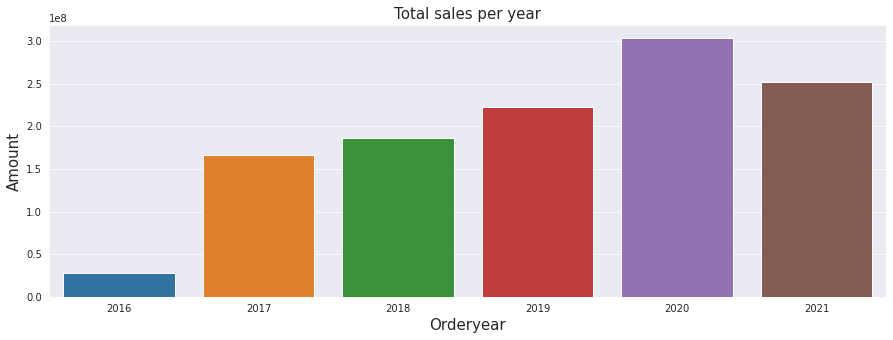

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_yearly_sales,x='orderyear',y='Amount')
sns.set_style('darkgrid')
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)
plt.title('Total sales per year',size=15)

Text(0.5, 1.0, 'Total Monthly sales per year')

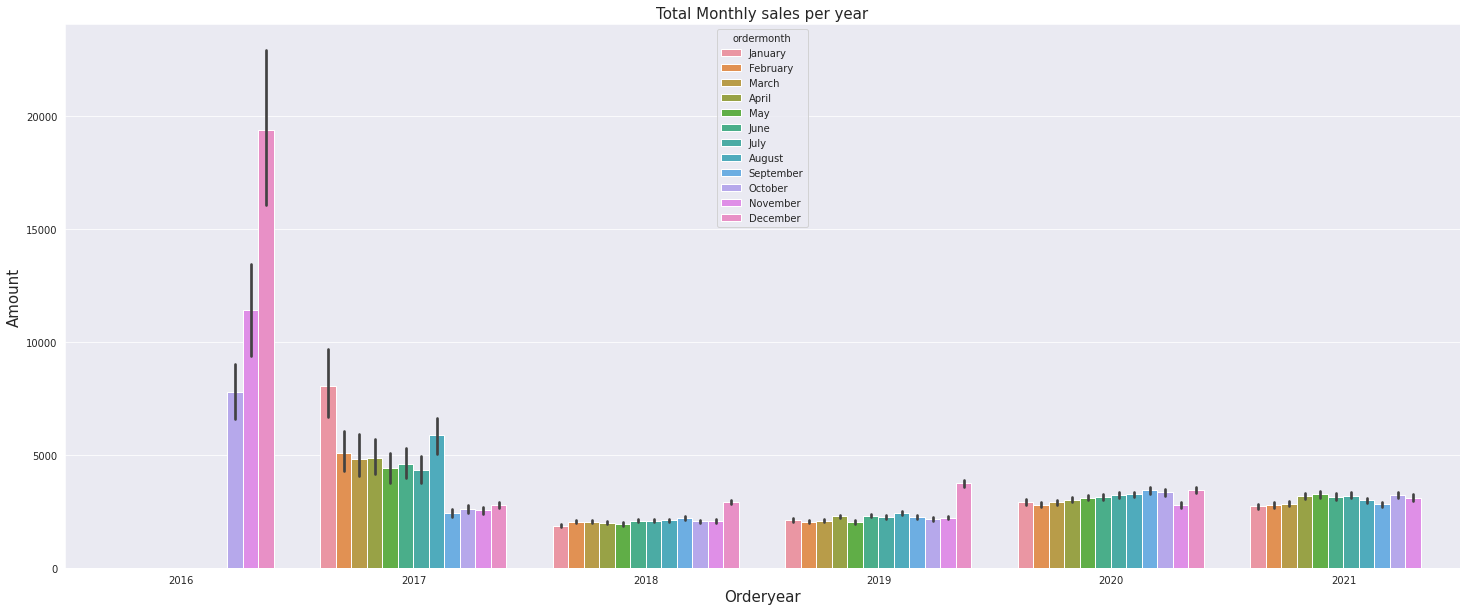

In [34]:
plt.figure(figsize=(25,10))
sns.barplot(data=bue,x='orderyear',y='Amount',hue='ordermonth')
sns.set_style('darkgrid')
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)
plt.title('Total Monthly sales per year',size=15)

In [35]:
twenty16=bue[bue['orderyear']==2016].reset_index()
twenty17=bue[bue['orderyear']==2017].reset_index()
twenty18=bue[bue['orderyear']==2018].reset_index()
twenty19=bue[bue['orderyear']==2019].reset_index()
twenty20=bue[bue['orderyear']==2020].reset_index()
twenty21=bue[bue['orderyear']==2021].reset_index()

In [36]:
twenty16.drop(['index'],axis=1,inplace=True)

In [37]:
twenty16.head()

,OrderDate,productDescription,Orders,Quantity,Amount,ordermonth,orderyear
0,2016-10-01,28 BLACK ACAI CLASSIC,1,2,275.86,October,2016
1,2016-12-01,28 BLACK ACAI CLASSIC,1,20,2758.60,December,2016
2,2016-12-01,360 DOUBLE CHOCOLATE VODKA 750ML,1,1,1206.90,December,2016
3,2016-12-01,360 MANDARIN ORANGE FLAVOUR VODKA 750ML,1,1,1206.90,December,2016
4,2016-11-01,28 BLACK ACAI CLASSIC,1,29,3999.97,November,2016


In [38]:
twenty16["ordermonth"] = twenty16["ordermonth"].astype('category').cat.remove_categories(['January', 'February', 'March',
                                                                         'April','May','June','July','August','September'])

Text(0, 0.5, 'Amount')

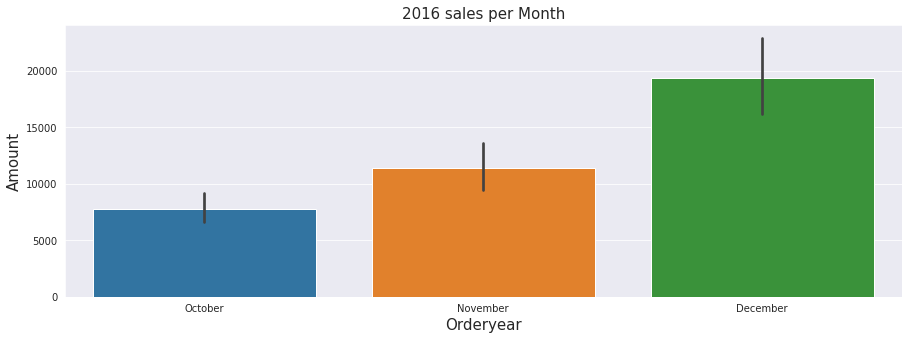

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(data=twenty16,x='ordermonth',y='Amount')
sns.set_style('darkgrid')
plt.title('2016 sales per Month',size=15)
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)

In [40]:
twenty17["ordermonth"] = twenty17["ordermonth"].astype('category').cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'])
twenty18["ordermonth"] = twenty18["ordermonth"].astype('category').cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'])
twenty19["ordermonth"] = twenty19["ordermonth"].astype('category').cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'])
twenty20["ordermonth"] = twenty20["ordermonth"].astype('category').cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'])
twenty21["ordermonth"] = twenty21["ordermonth"].astype('category').cat.remove_categories('December')

Text(0, 0.5, 'Amount')

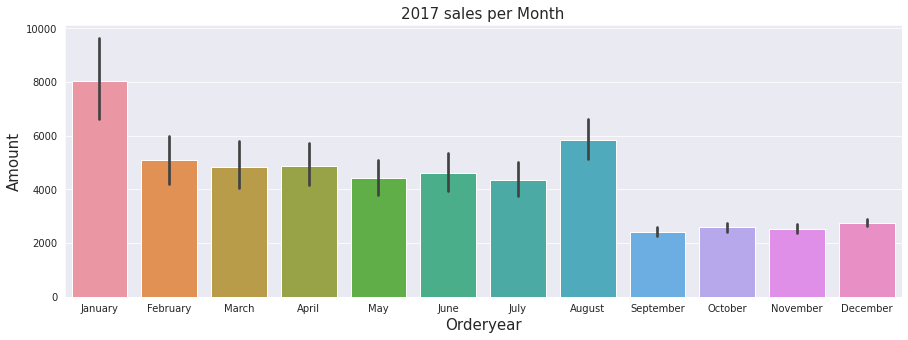

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(data=twenty17,x='ordermonth',y='Amount')
sns.set_style('darkgrid')
plt.title('2017 sales per Month',size=15)
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)

Text(0, 0.5, 'Amount')

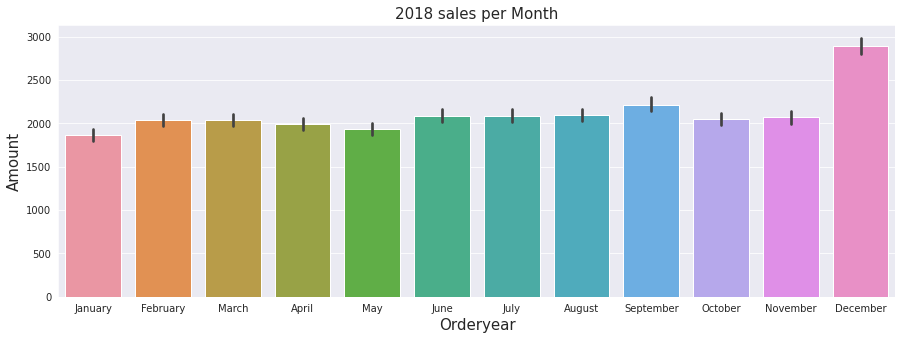

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(data=twenty18,x='ordermonth',y='Amount')
sns.set_style('darkgrid')
plt.title('2018 sales per Month',size=15)
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)

Text(0, 0.5, 'Amount')

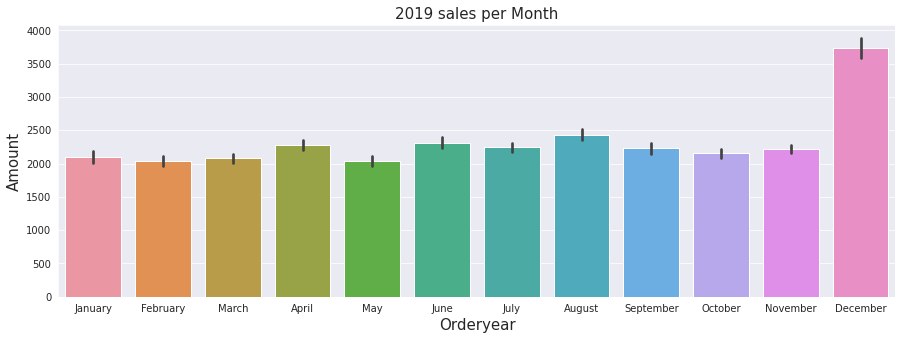

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(data=twenty19,x='ordermonth',y='Amount')
sns.set_style('darkgrid')
plt.title('2019 sales per Month',size=15)
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)

Text(0, 0.5, 'Amount')

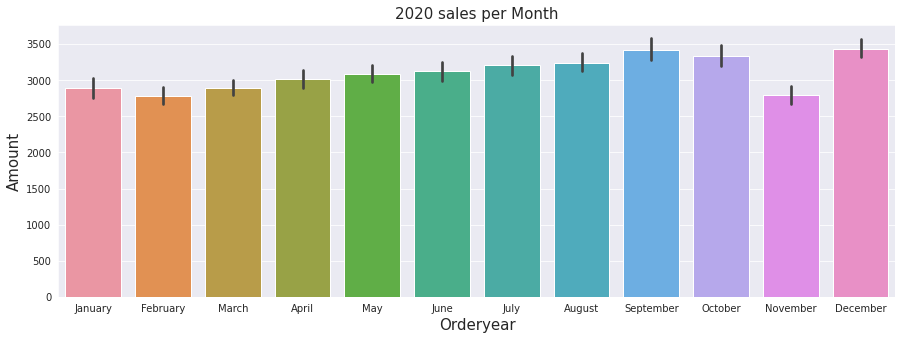

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(data=twenty20,x='ordermonth',y='Amount')
sns.set_style('darkgrid')
plt.title('2020 sales per Month',size=15)
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)

Text(0, 0.5, 'Amount')

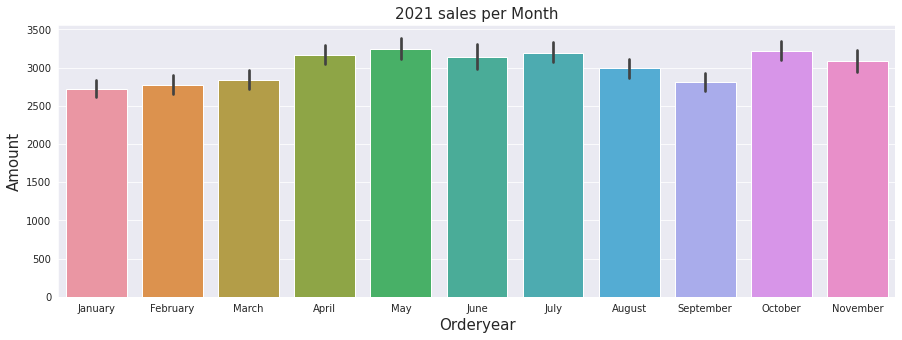

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(data=twenty21,x='ordermonth',y='Amount')
sns.set_style('darkgrid')
plt.title('2021 sales per Month',size=15)
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)